# Observe

In [21]:
%matplotlib inline
import time
import pylab
import numpy as np
import pandas as pd
from dateutil import parser
from matplotlib.dates import date2num
from pysurvey.plot import setup, density, icolorbar, text, legend, outline, dateticks

In [2]:
people = pd.read_csv('/Users/ajmendez/data/okcupid/random_v3.csv')

In [9]:
del people['Unnamed: 0']
del people['Unnamed: 0.1']
people.columns

Index([u'age', u'count', u'first', u'last', u'location', u'match', u'response',
       u'username', u'lat', u'lon', u'nloc', u'username_number',
       u'username_nlength'],
      dtype='object')

In [17]:
isfirst = (people['first'].notnull())
tmp = people[isfirst]['first'].apply(parser.parse)
islast = (people['last'].notnull())
tmp2 = people[islast]['last'].apply(parser.parse)

In [ ]:
people.loc[isfirst, 'first_datenum'] = tmp.apply(date2num)
people.loc[islast, 'last_datenum'] = tmp2.apply(date2num)

In [47]:
isboth = (people['first'].notnull()) & (people['last'].notnull())
tmp = people[isboth]
people.loc[isboth, 'mean_datenum'] = (tmp.first_datenum + tmp.last_datenum)/2.0
people.loc[isboth, 'datenum_width'] = (tmp.last_datenum-tmp.first_datenum)

In [52]:
observe = people[isboth].sort_values(by='datenum_width')
print len(observe)

234803


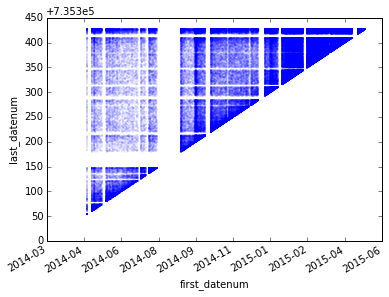

In [58]:
setup(figsize=(12,6), subplt=(1,2,1))
observe.plot('first_datenum', 'last_datenum', kind='scatter', alpha=0.1, lw=0, s=2, )
dateticks('%Y-%m')


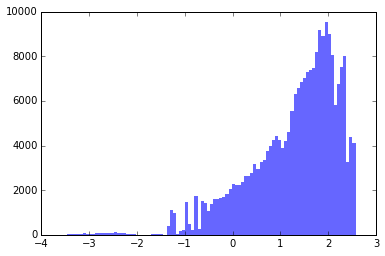

In [68]:
_ = pylab.hist(np.log10(observe['datenum_width'].as_matrix()), bins=100, lw=0, alpha=0.6)

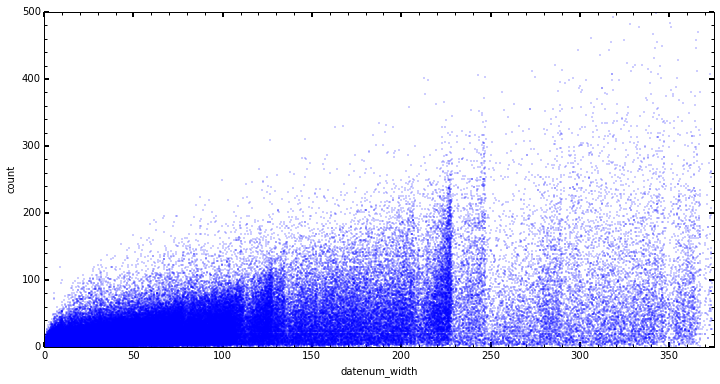

In [74]:
ax = setup(figsize=(12,6), xr=[0,375], yr=[0,500])
observe.plot('datenum_width', 'count', kind='scatter', s=2, lw=0, alpha=0.5, ax=ax)

IndexError: single positional indexer is out-of-bounds

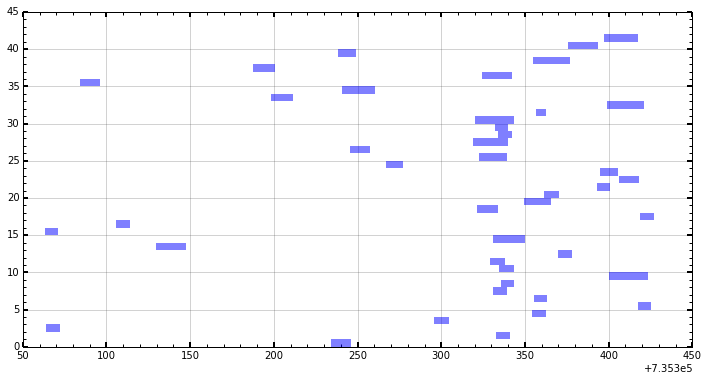

In [53]:
setup(figsize=(12,6))
for i, idx in enumerate(observe.index):
    tmp = observe.iloc[idx]
    pylab.bar(left=tmp.first_datenum,
              width=tmp.datenum_width,
              bottom=i, height=1,
              lw=0, alpha=0.5,
             )
    if i > 1000:
        break
dateticks()